In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

Prepare data

In [7]:
df = pd.read_csv('data/rates_lit_our_lab.csv')
df.fillna(0, inplace=True) 

Plot

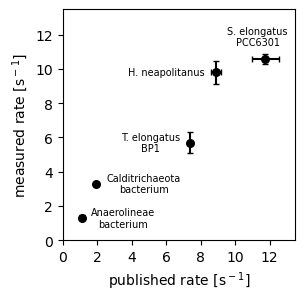

In [8]:
df["species_name"].replace({
    "T. elongatus BP1": "T. elongatus\nBP1",
    "S. elongatus PCC6301": "S. elongatus\nPCC6301",
    "Anaerolineae bacterium": "Anaerolineae\nbacterium",
    "Calditrichaeota bacterium": "Calditrichaeota\nbacterium",
}, inplace=True)


label_locations = {
    "T. elongatus\nBP1": (5.1, 5.7),
    "S. elongatus\nPCC6301": (11.3, 11.9),
    "Anaerolineae\nbacterium": (3.5, 1.3),
    "Calditrichaeota\nbacterium": (4.7, 3.3),
    "H. neapolitanus": (6, 9.8)
}

plt.figure(figsize=(3, 3))

for i, row in df.iterrows():
    species_name = row["species_name"]
    plt.scatter(row["published_rate"], row["this_study_rate"], s=30, c='black')
    
    # Get the specific location for the species label from the dictionary
    label_x, label_y = label_locations.get(species_name, (row["published_rate"], row["this_study_rate"]))
    plt.text(label_x, label_y, species_name, fontsize=7, va='center', ha='center')
    
    # Add horizontal and vertical error bars
    plt.errorbar(
        x=row["published_rate"],
        y=row["this_study_rate"],
        xerr=row["published_sem"],
        yerr=row["this_study_sem"],
        fmt='none',
        ecolor='black',
        capsize=2,
    )

plt.xlim(0, 13.5)
plt.ylim(0, 13.5)
plt.xticks(np.arange(0, 14, 2))
plt.yticks(np.arange(0, 14, 2))
plt.xlabel("published rate [s$^-$$^1$]")
plt.ylabel("measured rate [s$^-$$^1$]")

plt.savefig(r'plots/rates_lit_our_lab.png', dpi=300, bbox_inches='tight')
plt.show()